In [203]:
import autograd.numpy as np  # Thinly-wrapped numpy
from autograd import grad    # The only autograd function you may ever need
from autograd.scipy.stats import norm, chi2
import matplotlib.pyplot as plt


theta1 = 0.5
theta2 = 10
r = 0.05
t = 3
p = 100
sigma=0.5


def v(a):
    x = (np.log((1-a) * p * theta1/theta2) + sigma**2 * t / 2) / (sigma * np.sqrt(t))
    v = np.exp(-r*t) * ( (1-a)*p*theta1*norm.cdf(x) + sigma**2 * t / 2 - theta2*norm.cdf(x - sigma * np.sqrt(t)))
    return v
grad_v = grad(v)

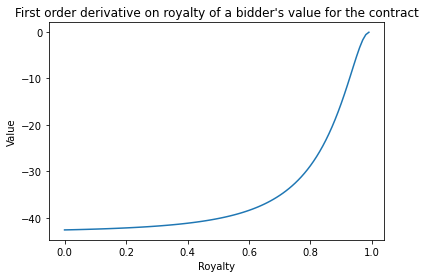

In [204]:
agrids = np.arange(0, 1, 0.01)
values = [grad_v(a) for a in agrids]
plt.title('First order derivative on royalty of a bidder\'s value for the contract')

plt.xlabel('Royalty')
plt.ylabel('Value')
plt.plot(agrids, values)

In [272]:
def prob(bid):
    a = bid[0]
    b = bid[1]
    return chi2.cdf(a + 10*np.log(b) - 10*np.log(theta2/theta1), 1)

grad_prob = grad(prob)

def objfun(bid):
    return (grad_prob(np.array([bid[0], bid[1]]))[0] / grad_prob(np.array([bid[0], bid[1]]))[1] - grad_v(bid[0]),
            )    

    

In [271]:
from scipy.optimize import fsolve

root = fsolve(prob, [1, 1])



In [297]:
theta1 = 0.5
theta2 = 10

a = 0.1
b = 13.0
bid=[a, b]
v(a)

30.69375640149627

In [298]:
grad_prob = grad(prob)

bid[1] + prob(bid) / grad_prob(bid)[1]

nan

In [299]:
prob(bid) 

0.0

/Users/kailiao/opt/anaconda3/lib/python3.8/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


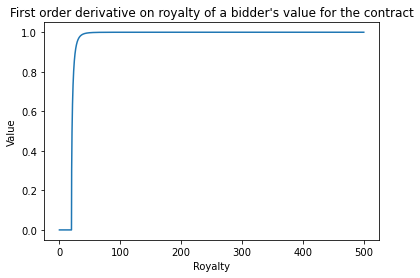

In [312]:
agrids = np.arange(0, 500, 0.1)
bid[0] = 0.1
values = [prob(np.array([bid[0], b])) for b in agrids]
plt.title('First order derivative on royalty of a bidder\'s value for the contract')

plt.xlabel('Royalty')
plt.ylabel('Value')
plt.plot(agrids, values)


In [202]:
from autograd.scipy.stats import norm, chi2
df = 55
chi2.cdf(a + np.log(b)/10 - 0.2*np.log(theta2/theta1), 1)

0.6425229637823799

In [201]:
1/5*np.log(theta2/theta1)

0.5991464547107982

1.4458835614025543